In [1]:
import copy

import numpy as np
import torch
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchmetrics.functional import auroc
from sklearn.metrics import roc_auc_score

import os
import re
import sys
plt.style.use('bmh')
plt.rcParams['svg.fonttype'] = 'none'
os.chdir('/project/learning_causal_discovery/')

from run.tools.api.infer import prepare_inference

['/run', '', '/usr/lib/python3.9/site-packages', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/tmp/tmp1p8sf3a1', '/project/learning_causal_discovery/run', '/project/learning_causal_discovery/run/external']


In [2]:
game = 'DonkeyKong'
cfg = '/project/learning_causal_discovery/work_dir/patch_tcn_128_fold_42/patch_tcn_128.py'
ckpt = '/project/learning_causal_discovery/work_dir/patch_tcn_128_fold_42/ckpts/exp_name=patch_tcn_128_fold_42-cfg=atch_tcn_128-bs=256-seed=42-val_auroc=0.8811.ckpt'

In [7]:
np.load(f'.cache/sim_data/{game}/HR/' + 'Regular_3510_step_256_rec_2e3_noise_0.5_seed_42.npy').shape

(3510, 512000)

In [12]:
for noise in [0.1, 0.3, 0.5]:
    seed = 42
    di, mi = prepare_inference(cfg, ckpt)
    mi = mi.cuda()
    di.data_cfg.test.data_root = f'.cache/sim_data/{game}/HR/' + f'Regular_3510_step_256_rec_2e3_noise_{noise}_seed_{seed}.npy'
    di.data_cfg.test.split = f'.cache/sim_data/{game}/csv/fold_seed_42/' + 'test_sim_grouped.csv'
    di.setup()
    di.data_cfg.test_batch_size = 1024
    dl = di.test_dataloader()
    preds = []
    labels = []
    mi.eval()
    with torch.no_grad():
        for i, (x, y) in tqdm(enumerate(dl), total=len(dl), desc=f'{mi.hparams.model.arch.type}'):
            pred = mi(x.cuda())
            preds.append(pred.softmax(dim=-1)[:, 1].detach().cpu())
            labels.append(y.detach().cpu())
    preds = torch.cat(preds, dim=0)
    labels = torch.cat(labels, dim=0)
    score = auroc(preds, labels, pos_label=1)
    print(f"AUROC on game {game}, noise {noise}, seed {seed}: {score:.4f}")

/usr/local/lib/python3.9/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
TCN: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.56it/s]
/usr/local/lib/python3.9/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.9/dist-pa

AUROC on game DonkeyKong, noise 0.1, seed 42: 0.8769


TCN: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  4.56it/s]


AUROC on game DonkeyKong, noise 0.3, seed 42: 0.8693


/usr/local/lib/python3.9/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
TCN: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.98it/s]

AUROC on game DonkeyKong, noise 0.5, seed 42: 0.8282


In [ ]:
# evaluate the baselines
root_folder =

### Evaluate multiple perturbed result

In [105]:
len(pickle.load(open('/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/multiple_perturb_config.pkl', 'rb')))

869

In [17]:
len(perturbed)//64

401

In [2]:
import os
root = '/data2/charon/longitual_nmos/DonkeyKong/HR/multiple_64'
# get all the perturbed result
perturbed = [os.path.join(root, f) for f in os.listdir(root)]
perturbed

['/data2/charon/longitual_nmos/DonkeyKong/HR/multiple_64/Adaptive_3510_step_2048_tidx_421_halfclk_288.npy',
 '/data2/charon/longitual_nmos/DonkeyKong/HR/multiple_64/Adaptive_3510_step_2048_tidx_2460_halfclk_1632.npy',
 '/data2/charon/longitual_nmos/DonkeyKong/HR/multiple_64/Adaptive_3510_step_2048_tidx_185_halfclk_576.npy',
 '/data2/charon/longitual_nmos/DonkeyKong/HR/multiple_64/Adaptive_3510_step_2048_tidx_692_halfclk_1600.npy',
 '/data2/charon/longitual_nmos/DonkeyKong/HR/multiple_64/Adaptive_3510_step_2048_tidx_703_halfclk_2016.npy',
 '/data2/charon/longitual_nmos/DonkeyKong/HR/multiple_64/Adaptive_3510_step_2048_tidx_2444_halfclk_1504.npy',
 '/data2/charon/longitual_nmos/DonkeyKong/HR/multiple_64/Adaptive_3510_step_2048_tidx_2053_halfclk_1792.npy',
 '/data2/charon/longitual_nmos/DonkeyKong/HR/multiple_64/Adaptive_3510_step_2048_tidx_2248_halfclk_1184.npy',
 '/data2/charon/longitual_nmos/DonkeyKong/HR/multiple_64/Adaptive_3510_step_2048_tidx_137_halfclk_352.npy',
 '/data2/charon/lo

In [3]:
def resample(marked_data):
    # padding to sequence with fix length in a half-clock by the markers (-1) in recording
    marked_data = np.where(marked_data==255, -1, marked_data)
    # detect the end of , last marker point is the end of the sequence
    marked_data = marked_data[:, :np.where(marked_data[0]!=-1)[0][-1]+2]
    # before padding
    print('raw sample length: ', marked_data.shape[1])
    clocks = []
    snippet_lengths = []
    markers = np.where(marked_data[0]==-1)[0].tolist()
    for idx, marker in enumerate(markers):
        if idx == 0:
            clock = marked_data[:, :markers[idx]]
        else:
            clock = marked_data[:, markers[idx-1]+1:markers[idx]]
        steps = clock.shape[1]
        snippet_lengths.append(steps)
        # if the step number in a half-clock is less than step_limit, padding it with the last state to step_limit
        if steps < step_limit:
            if clock.shape[1] == 0:
                clock = np.concatenate((clock, np.tile(clock.reshape(-1, 1), step_limit-steps)), axis=1)
            else:
                clock = np.concatenate((clock, np.tile(clock[:, -1].reshape(-1, 1), step_limit-steps)), axis=1)
        clocks.append(clock)
    marked_data = np.concatenate(clocks, axis=1) if len(clocks) > 1 else clocks[0]
    print('maximum snippet length: ', max(snippet_lengths))
    return marked_data

In [3]:
import numpy as np

tidx = 372
target_files = {int(f.split('_')[-1].split('.')[0]): f for f in perturbed if f'tidx_{tidx}' in f}
target_files

{64: '/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/HR/multiple_16/Adaptive_3510_step_512_tidx_372_halfclk_64.0.npy',
 352: '/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/HR/multiple_16/Adaptive_3510_step_512_tidx_372_halfclk_352.0.npy',
 96: '/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/HR/multiple_16/Adaptive_3510_step_512_tidx_372_halfclk_96.0.npy',
 224: '/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/HR/multiple_16/Adaptive_3510_step_512_tidx_372_halfclk_224.0.npy',
 128: '/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/HR/multiple_16/Adaptive_3510_step_512_tidx_372_halfclk_128.0.npy',
 416: '/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/HR/multiple_16/Adaptive_3510_step_512_tidx_372_halfclk_416.0.npy',
 32: '/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/HR/multiple_16/Adaptive_3510_step_512_tidx_372_halfclk_32.0.npy',
 480: '/home/charon/project/lcd_official/.cache/sim_data/Donk

In [10]:
import numpy as np
step_limit = 2000
rec_orig = np.load('/data2/charon/longitual_nmos/DonkeyKong/HR/Regular_3510_step_2048_rec_2e3.npy', mmap_mode='r')

In [11]:
def get_common_effects(l):
    # Remove all the empty sublists
    l = [sublist for sublist in l if sublist]
    # Convert the first sublist to a set
    if l:
        common_elements = set(l[0])

        # Iterate through the remaining sublists and compute the intersection
        for sublist in l[1:]:
            common_elements = common_elements.intersection(sublist)

        # Convert the result back to a list
        common_elements = list(common_elements)
    else:
        common_elements = []
    return common_elements


In [ ]:
# divide the 512 half-clocks into training and testing (256 and 256)
# 256 half-clocks for training, 256 half-clocks for testing


In [15]:
import pickle
from tqdm import tqdm
interval = 10
unique_perturb = pickle.load(open('/data2/charon/longitual_nmos/DonkeyKong/multiple_64_perturb_config.pkl', 'rb'))

effects = {}

for tidx in tqdm(unique_perturb, total=len(unique_perturb)):
    causal_effects = {}
    for halfclk, action in unique_perturb[tidx]:
        _causal_effects = []
        # padding to the fix length of one half-clock, last point is marker (-1)
        target_files = {int(f.split('_')[-1].split('.')[0]): f for f in perturbed if f'tidx_{tidx}' in f}
        perturb = np.load(target_files[halfclk])
        if perturb.shape[1] > step_limit:
            # if the step number in a half-clock is more than step_limit, meaning not converge
            perturb = perturb[:, :step_limit]
        else:
            padded_perturb = np.concatenate(
                (perturb[:, :-1], np.tile(perturb[:, -2].reshape(-1, 1), step_limit - perturb.shape[1] + 1)), axis=1)
        # compare the regular state and 'perturbed' state when the cause transistor (idx) is perturbed
        for i in unique_perturb:
            # skip the cause transistor
            if i != tidx:
                # calculate the difference between the regular and the 'perturbed' in the half-clock perturbation actually works
                if not np.array_equal(rec_orig[i, int(halfclk*step_limit):int((halfclk+1)*step_limit)], padded_perturb[i, :]):
                    _causal_effects.append(i)
        causal_effects[halfclk] = _causal_effects
    # get the common effects across multiple times of perturbation
    effects[tidx] = causal_effects

 46%|█████████████████████████████████████████████████████████████████████████████▎                                                                                          | 401/871 [17:40<20:43,  2.65s/it]


KeyError: 576

In [42]:
unique_perturb[0]

[(0, 'low'),
 (32, 'low'),
 (64, 'low'),
 (96, 'low'),
 (128, 'low'),
 (160, 'low'),
 (192, 'low'),
 (224, 'low'),
 (256, 'low'),
 (288, 'low'),
 (320, 'low'),
 (352, 'low'),
 (384, 'low'),
 (416, 'low'),
 (448, 'low'),
 (480, 'low'),
 (512, 'low'),
 (544, 'low'),
 (576, 'low'),
 (608, 'low'),
 (640, 'low'),
 (672, 'low'),
 (704, 'low'),
 (736, 'low'),
 (768, 'low'),
 (800, 'low'),
 (832, 'low'),
 (864, 'low'),
 (896, 'low'),
 (928, 'low'),
 (960, 'low'),
 (992, 'low'),
 (1024, 'low'),
 (1056, 'low'),
 (1088, 'low'),
 (1120, 'low'),
 (1152, 'low'),
 (1184, 'low'),
 (1216, 'low'),
 (1248, 'low'),
 (1280, 'low'),
 (1312, 'low'),
 (1344, 'low'),
 (1376, 'low'),
 (1408, 'low'),
 (1440, 'low'),
 (1472, 'low'),
 (1504, 'low'),
 (1536, 'low'),
 (1568, 'low'),
 (1600, 'low'),
 (1632, 'low'),
 (1664, 'low'),
 (1696, 'low'),
 (1728, 'low'),
 (1760, 'low'),
 (1792, 'low'),
 (1824, 'low'),
 (1856, 'low'),
 (1888, 'low'),
 (1920, 'low'),
 (1952, 'low'),
 (1984, 'low'),
 (2016, 'low')]

In [45]:
a = get_common_effects([effects[0][i] for i in range(256, 1024, 32)])
b = get_common_effects([effects[0][i] for i in range(1024, 2048, 32)])
set(a).intersection(set(b))

{41,
 57,
 156,
 192,
 220,
 691,
 795,
 873,
 881,
 1127,
 1178,
 1375,
 1379,
 1501,
 1519,
 1534,
 1566,
 1917,
 1939,
 1959,
 1969,
 2013,
 2228,
 2264,
 2333,
 2541,
 2673,
 2681,
 2755,
 2822,
 2874,
 2894,
 3123,
 3146,
 3213,
 3326,
 3385}

In [32]:
effects[0]

{0: [2673],
 32: [1,
  6,
  2050,
  15,
  25,
  2096,
  2056,
  57,
  87,
  100,
  104,
  109,
  118,
  153,
  156,
  160,
  166,
  192,
  2246,
  2250,
  205,
  2256,
  2258,
  213,
  239,
  246,
  255,
  2357,
  317,
  328,
  338,
  346,
  350,
  375,
  2452,
  403,
  2454,
  2457,
  429,
  433,
  434,
  445,
  446,
  464,
  465,
  482,
  2541,
  496,
  507,
  2569,
  2585,
  547,
  2140,
  559,
  566,
  2621,
  2648,
  2658,
  687,
  691,
  718,
  2777,
  2786,
  2862,
  2874,
  2890,
  873,
  881,
  2936,
  894,
  905,
  2205,
  944,
  3015,
  968,
  974,
  990,
  1001,
  1011,
  1046,
  2763,
  3143,
  2572,
  1180,
  3234,
  1189,
  1194,
  1212,
  2942,
  1274,
  1282,
  3338,
  2605,
  1348,
  2614,
  1366,
  3421,
  1383,
  3433,
  1388,
  1389,
  2092,
  1397,
  3457,
  1469,
  1501,
  1519,
  1520,
  1526,
  1656,
  1701,
  2673,
  1710,
  1711,
  1729,
  3399,
  3021,
  1778,
  3372,
  1869,
  1917,
  1920,
  1937,
  2373,
  1955,
  1978,
  2005,
  2008,
  2013,
  2019],
 6

In [22]:
pickle.dump({_: effect for _, effect in effects.items() if effect}, open(os.path.join("project/lcd_official/.cache/sim_data", "DonkeyKong/adjacency_matrix_multiple.pkl"), "wb"))

In [19]:
print(f"causal pairs number is {len(sum([v for v in effects.values()], []))}")

causal pairs number is 4538


In [26]:
import pandas as pd
test_df = pd.read_csv('/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/csv/fold_seed_42/test_sim_grouped_interval_10.csv')
val_df = pd.read_csv('/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/csv/fold_seed_42/valid_sim_grouped_interval_10.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/csv/fold_seed_42/test_sim_grouped_interval_10.csv'

In [12]:
len([effect for effect in effects.values() if effect])

514

In [27]:
effects

{0: [2673],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 2049: [577, 513, 3335, 1931, 2448, 337],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 2050: [166],
 14: [],
 15: [],
 16: [],
 2066: [50],
 19: [],
 2068: [970],
 2069: [],
 22: [],
 2071: [3049, 3157],
 25: [],
 28: [],
 29: [],
 30: [],
 2053: [],
 2054: [],
 38: [],
 40: [],
 41: [410],
 42: [],
 44: [],
 46: [],
 2096: [1001],
 2056: [226, 1955, 2019, 229, 1575, 2605, 46, 465, 507, 1532, 445],
 50: [],
 2099: [2, 1613, 2030, 270, 215],
 2100: [1581],
 2101: [226, 1955, 2019, 229, 1575, 2605, 46, 433, 465, 507, 1532, 445],
 57: [],
 58: [],
 59: [],
 61: [],
 2110: [1215, 1693, 543],
 2111: [],
 64: [1363, 1340],
 2113: [1841, 1276, 2901],
 66: [2945,
  3457,
  3338,
  403,
  927,
  160,
  1575,
  2475,
  2605,
  46,
  1710,
  944,
  2096,
  2862,
  566,
  2871,
  1337,
  699,
  1212,
  445,
  1348,
  2246,
  968,
  1366,
  1753,
  346,
  226,
  2019,
  100,
  229,
  1254,
  2786,
  3173,
  1001,
  2921,
  239,
  496,
  177

In [180]:
effects_0_256 = effects.copy()

In [181]:
import pickle
from tqdm import tqdm
interval = 10
unique_perturb = pickle.load(open('/home/charon/project/lcd_official/.cache/sim_data/DonkeyKong/multiple_perturb_config.pkl', 'rb'))

effects = {}

for tidx in tqdm(unique_perturb, total=len(unique_perturb)):
    causal_effects = []
    for halfclk, action in unique_perturb[tidx]:
        if halfclk <= 256:
            continue
        _causal_effects = []
        # padding to the fix length of one half-clock, last point is marker (-1)
        target_files = {int(f.split('_')[-1].strip('.npy')): f for f in perturbed if f'tidx_{tidx}' in f}
        perturb = np.load(target_files[halfclk])
        if perturb.shape[1] > step_limit:
            # if the step number in a half-clock is more than step_limit, meaning not converge
            perturb = perturb[:, :step_limit]
        else:
            padded_perturb = np.concatenate(
                (perturb[:, :-1], np.tile(perturb[:, -2].reshape(-1, 1), step_limit - perturb.shape[1] + 1)), axis=1)
        # compare the regular state and 'perturbed' state when the cause transistor (idx) is perturbed
        for i in range(rec_orig.shape[0]):
            # skip the cause transistor
            if i != tidx:
                # calculate the difference between the regular and the 'perturbed' in the half-clock perturbation actually works
                if not np.array_equal(rec_orig[i, halfclk*step_limit:(halfclk+1)*step_limit], padded_perturb[i, :]):
                    _causal_effects.append(i)
        causal_effects.append(_causal_effects)
    # get the common effects across multiple times of perturbation
    effects[tidx] = get_common_effects(causal_effects)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 869/869 [04:35<00:00,  3.15it/s]


In [27]:
num_perturbs = {}
for idx, v in unique_perturb.items():
    # get the perturbation number in the first 256 half-clock and the latter 256 half-clock
    num_0_384 = 0
    num_384_512 = 0
    for halfclk, action in v:
        if halfclk > 384:
            num_384_512 += 1
        else:
            num_0_384 += 1
    num_perturbs[idx] = (num_0_384, num_384_512)

In [24]:
outlier = 0
for idx in num_perturbs:
    if num_perturbs[idx][1] == 0:
        outlier += 1

In [28]:
num_perturbs

{0: (13, 3),
 1: (13, 3),
 2: (13, 3),
 3: (13, 3),
 4: (13, 3),
 5: (13, 3),
 6: (13, 3),
 2049: (13, 3),
 8: (13, 3),
 9: (13, 3),
 10: (13, 3),
 11: (13, 3),
 12: (13, 3),
 2050: (13, 3),
 14: (13, 3),
 15: (13, 3),
 16: (13, 3),
 2066: (13, 3),
 19: (13, 3),
 2068: (13, 3),
 2069: (13, 3),
 22: (13, 3),
 2071: (13, 3),
 25: (13, 3),
 28: (13, 3),
 29: (13, 3),
 30: (13, 3),
 2053: (13, 3),
 2054: (13, 3),
 38: (13, 3),
 40: (13, 3),
 41: (13, 3),
 42: (13, 3),
 44: (13, 3),
 46: (13, 3),
 2096: (13, 3),
 2056: (13, 3),
 50: (13, 3),
 2099: (13, 3),
 2100: (13, 3),
 2101: (13, 3),
 57: (13, 3),
 58: (13, 3),
 59: (13, 3),
 61: (13, 3),
 2110: (13, 3),
 2111: (13, 3),
 64: (13, 3),
 2113: (13, 3),
 66: (13, 3),
 67: (13, 3),
 70: (13, 3),
 2119: (13, 3),
 2121: (13, 3),
 74: (13, 3),
 76: (13, 3),
 3426: (13, 3),
 79: (13, 3),
 80: (13, 3),
 82: (13, 3),
 3427: (13, 3),
 87: (13, 3),
 89: (13, 3),
 92: (13, 3),
 2144: (13, 3),
 99: (13, 3),
 100: (13, 3),
 102: (13, 3),
 104: (13, 3)

In [189]:
len([1 for idx in effects if effects[idx]]), set(list(num_perturbs.keys())).intersection()


490

In [190]:
effects = []

{0: [],
 1: [6,
  8,
  11,
  12,
  13,
  2063,
  19,
  2069,
  25,
  26,
  27,
  30,
  31,
  38,
  40,
  2089,
  44,
  2092,
  46,
  47,
  48,
  49,
  2093,
  2094,
  2096,
  53,
  2097,
  55,
  56,
  2099,
  2100,
  61,
  62,
  2111,
  64,
  2114,
  2121,
  74,
  2124,
  80,
  81,
  89,
  90,
  91,
  2144,
  2145,
  99,
  100,
  104,
  106,
  2157,
  2158,
  2159,
  2160,
  2161,
  2162,
  2163,
  116,
  118,
  2167,
  2168,
  2169,
  2170,
  123,
  2171,
  2172,
  2173,
  2174,
  2175,
  2176,
  2177,
  131,
  2178,
  2181,
  134,
  135,
  2183,
  2185,
  138,
  139,
  3506,
  2189,
  2190,
  2191,
  2193,
  146,
  2197,
  2198,
  151,
  2199,
  2948,
  2203,
  158,
  159,
  161,
  162,
  2210,
  2211,
  171,
  172,
  2220,
  177,
  183,
  184,
  2232,
  2233,
  2244,
  197,
  2245,
  200,
  201,
  205,
  206,
  207,
  208,
  209,
  210,
  211,
  2254,
  2256,
  2258,
  3298,
  3299,
  217,
  218,
  2266,
  3300,
  222,
  2273,
  226,
  2274,
  229,
  230,
  2282,
  2283,
  2284,
  2

In [183]:
num_perturbs

{0: (2, 0),
 1: (9, 1),
 2: (10, 2),
 4: (2, 0),
 5: (10, 2),
 6: (16, 6),
 2049: (2, 0),
 8: (10, 2),
 9: (86, 85),
 10: (2, 2),
 11: (86, 85),
 12: (15, 3),
 2050: (2, 0),
 14: (86, 85),
 15: (4, 0),
 16: (4, 0),
 2066: (6, 1),
 19: (86, 85),
 2068: (2, 0),
 2069: (36, 10),
 22: (2, 2),
 2071: (2, 0),
 25: (27, 6),
 28: (38, 9),
 30: (16, 6),
 2053: (30, 6),
 2054: (2, 0),
 38: (6, 2),
 40: (12, 4),
 41: (1, 0),
 42: (14, 4),
 44: (15, 6),
 46: (82, 17),
 2096: (22, 4),
 2056: (4, 0),
 50: (6, 1),
 2099: (14, 2),
 2100: (4, 2),
 2101: (4, 0),
 57: (3, 0),
 58: (1, 0),
 59: (2, 0),
 61: (12, 4),
 2110: (2, 0),
 2111: (16, 4),
 64: (15, 4),
 2113: (2, 0),
 66: (2, 0),
 67: (10, 2),
 70: (26, 8),
 2119: (2, 0),
 2121: (6, 2),
 74: (10, 2),
 76: (86, 85),
 3426: (19, 3),
 79: (6, 2),
 80: (24, 6),
 82: (2, 0),
 3427: (15, 5),
 87: (2, 0),
 89: (8, 2),
 92: (2, 0),
 2144: (4, 2),
 99: (8, 2),
 100: (31, 3),
 102: (25, 6),
 104: (9, 1),
 105: (4, 2),
 106: (13, 3),
 107: (6, 1),
 109: (2, 

In [177]:
52037/600

86.72833333333334

In [174]:
len([v for v in effects.values() if v])

593

In [163]:
len(causal_effects), get_common_effects(causal_effects)

(88, [])

In [14]:
effects

{0: [2673],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 2049: [577, 513, 3335, 1931, 2448, 337],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 2050: [166],
 14: [],
 15: [],
 16: [],
 2066: [50],
 19: [],
 2068: [970],
 2069: [],
 22: [],
 2071: [3049, 3157],
 25: [],
 28: [],
 29: [],
 30: [],
 2053: [],
 2054: [],
 38: [],
 40: [],
 41: [410],
 42: [],
 44: [],
 46: [],
 2096: [1001],
 2056: [226, 1955, 2019, 229, 1575, 2605, 46, 465, 507, 1532, 445],
 50: [],
 2099: [2, 1613, 2030, 270, 215],
 2100: [1581],
 2101: [226, 1955, 2019, 229, 1575, 2605, 46, 433, 465, 507, 1532, 445],
 57: [],
 58: [],
 59: [],
 61: [],
 2110: [1215, 1693, 543],
 2111: [],
 64: [1363, 1340],
 2113: [1841, 1276, 2901],
 66: [2945,
  3457,
  3338,
  403,
  927,
  160,
  1575,
  2475,
  2605,
  46,
  1710,
  944,
  2096,
  2862,
  566,
  2871,
  1337,
  699,
  1212,
  445,
  1348,
  2246,
  968,
  1366,
  1753,
  346,
  226,
  2019,
  100,
  229,
  1254,
  2786,
  3173,
  1001,
  2921,
  239,
  496,
  177

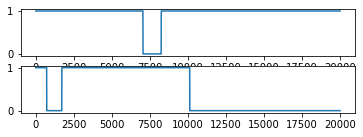

In [49]:
import matplotlib.pyplot as plt
plt.subplot(411)
plt.plot(rec_orig[0, ::10][:20000])
plt.subplot(412)
plt.plot(rec_orig[3385, ::10][:20000])
# plt.subplot(413)
# plt.plot(rec_orig[2222, ::10][:10000])
# plt.subplot(414)
# plt.plot(rec_orig[917, ::10][:10000])

In [2]:
# eda about dream3
import os
import sys
sys.path.append('/project/SRU_for_GCI')
os.chdir('/project/SRU_for_GCI')

from utils.utilFuncs import getGeneTrainingData, loadTrainingData, loadTrueNetwork

(array([ 0,  0,  0,  0,  1,  2,  2,  4,  4,  4,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 21, 22,
       23, 23, 24, 25, 26, 26, 27, 29, 29, 30, 30, 31, 32, 32, 32, 32, 33,
       33, 34, 34, 35, 36, 36, 36, 36, 37, 39, 39, 40, 40, 40, 41, 41, 42,
       42, 42, 43, 43, 43, 44, 44, 44, 47, 47, 48, 48, 49, 49]), array([ 1,  3,  7,  8,  3,  1,  8,  1,  3,  8,  1,  3,  8,  1,  3,  7,  8,
       46, 28, 16,  3,  3,  3,  8,  3,  7,  3,  7,  3,  7,  7,  7, 22,  7,
        7, 28,  7,  7,  7, 28, 25,  7, 28,  7, 28, 28,  7, 28, 38, 46,  7,
       28, 28, 38, 28,  7, 28, 38, 46, 28, 28, 38, 28, 38, 45, 28, 38, 28,
       38, 46, 28, 38, 46, 28, 38, 45,  7, 46,  7, 46, 28, 46]))


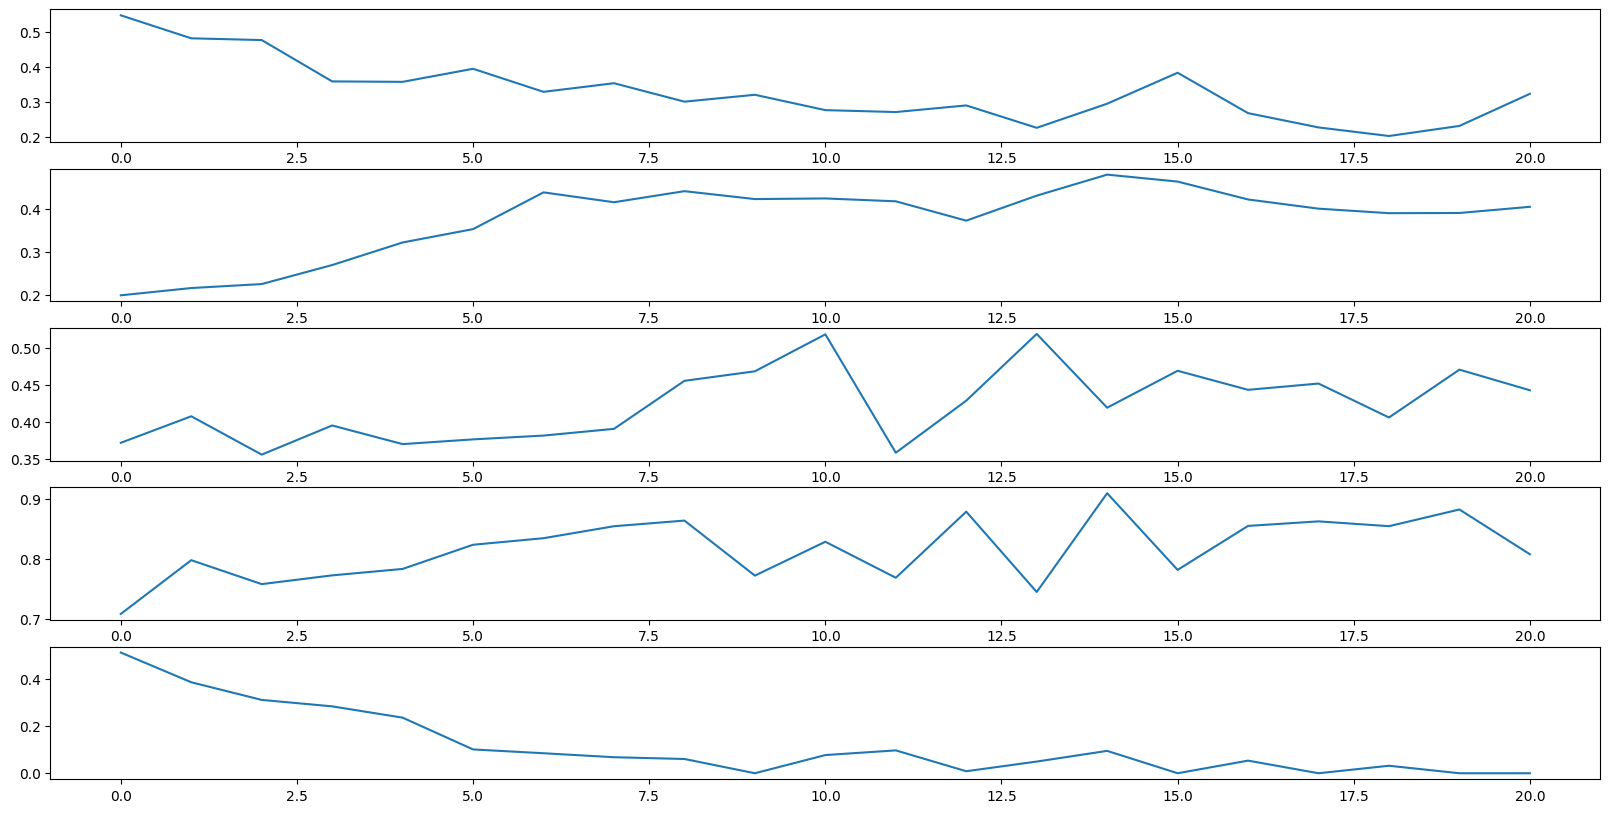

In [4]:
Xtrain = loadTrainingData('/project/lcd_v2/run/external/SRU_for_GCI/data/dream3/Dream3TensorData/Size50Ecoli2.pt', 'cpu')
Gref = loadTrueNetwork('/project/lcd_v2/run/external/SRU_for_GCI/data/dream3/TrueGeneNetworks/InSilicoSize50-Ecoli2.tsv', Xtrain.shape[1])

import numpy as np
from matplotlib import pyplot as plt

fig, axes = plt.subplots(5, 1, figsize=(20, 10))

for i in range(5):
    axes[i].plot(Xtrain[i, :][21:42])

print(np.where(Gref!=0))

In [2]:

for dataset_id in range(1, 6):
    Xtrain, Gref = getGeneTrainingData(dataset_id, 'cuda')
    print("seq shape: ", Xtrain.shape, "graph shape: ", Gref.shape)

seq shape:  torch.Size([100, 966]) graph shape:  (100, 100)
seq shape:  torch.Size([100, 966]) graph shape:  (100, 100)
seq shape:  torch.Size([100, 966]) graph shape:  (100, 100)
seq shape:  torch.Size([100, 966]) graph shape:  (100, 100)
seq shape:  torch.Size([100, 966]) graph shape:  (100, 100)


In [13]:
import numpy as np
np.where(Gref!=0)

(array([ 0,  0,  1,  2,  3,  3,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
        14, 14, 17, 18, 20, 20, 21, 23, 23, 24, 25, 26, 26, 27, 28, 29, 29,
        29, 32, 33, 34, 35, 36, 36, 36, 39, 39, 39, 39, 41, 41, 41, 41, 41,
        43, 43, 44, 45, 45, 47, 48, 49, 50, 50, 51, 52, 52, 53, 54, 54, 55,
        55, 56, 56, 57, 58, 58, 59, 59, 60, 61, 61, 62, 63, 64, 65, 66, 66,
        67, 67, 68, 69, 69, 70, 71, 72, 73, 74, 75, 76, 76, 76, 77, 79, 80,
        81, 82, 82, 83, 86, 87, 87, 88, 88, 88, 89, 89, 90, 91, 91, 93, 93,
        93, 94, 95, 96, 97, 99]),
 array([ 1,  4, 19,  1,  1,  4, 15,  4,  4,  4,  4,  4,  4,  4,  4,  4,  1,
        15, 16, 15, 15, 15, 22, 19, 15, 30, 22, 15, 15, 31, 25, 15, 15, 30,
        78, 31, 15, 30, 30,  4, 37, 38,  4, 40, 48, 78,  4, 40, 42, 48, 78,
        15, 44, 46, 15, 85, 46, 78, 46, 46, 48, 46, 48, 53, 48,  1, 48, 54,
        59, 54, 59, 54, 54, 59,  1, 54, 59, 54, 59, 59, 59, 59, 59, 59, 68,
        59, 68, 15, 54, 59, 68, 68, 68, 68, 68, 68, 44

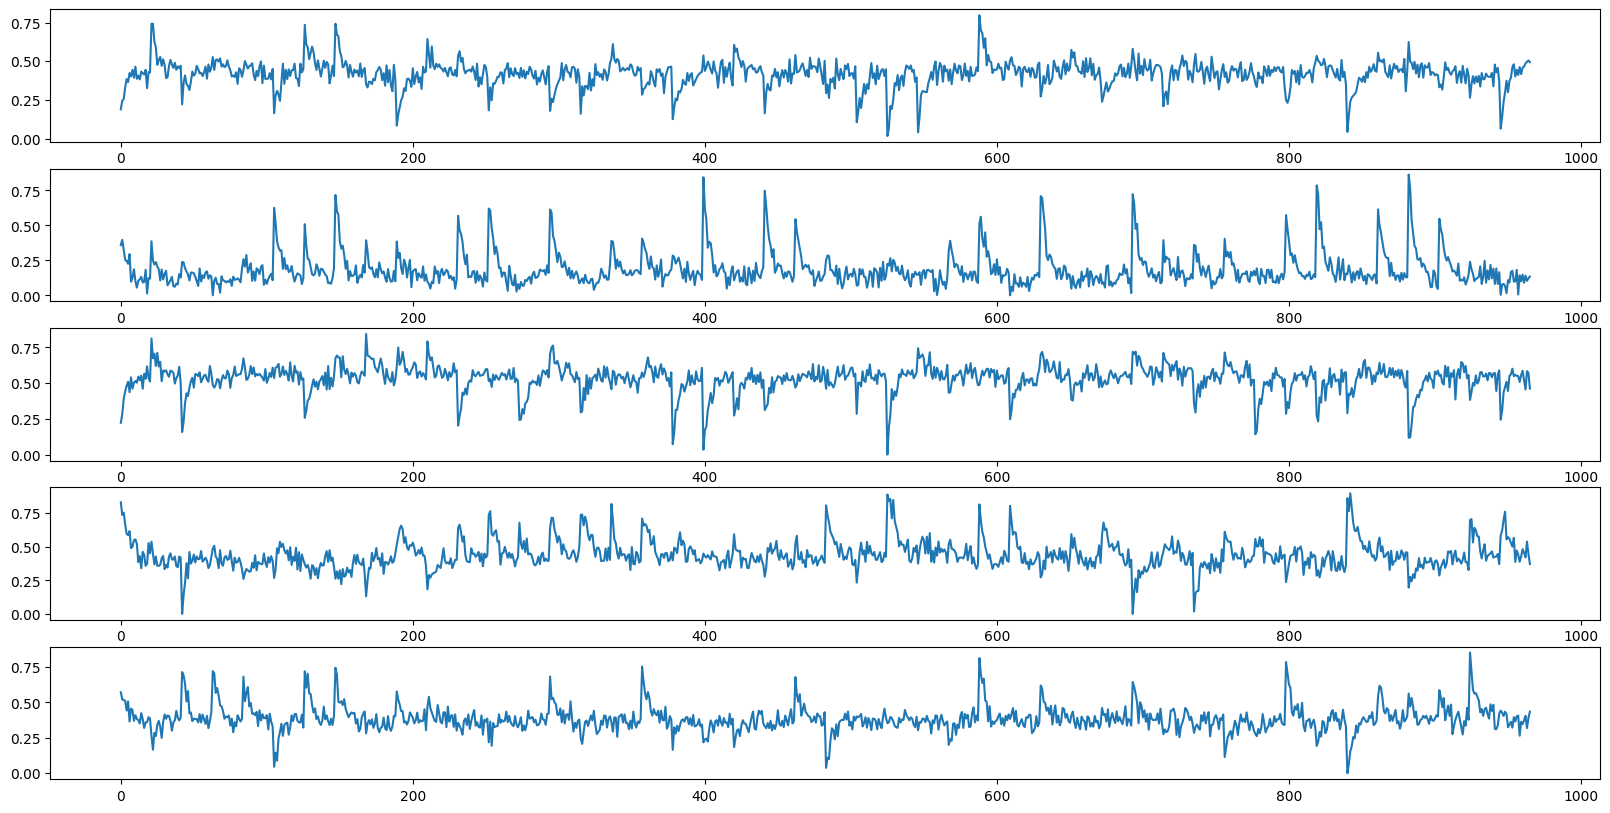

In [15]:
Xtrain, Gref = getGeneTrainingData(2, 'cpu')
from matplotlib import pyplot as plt

fig, axes = plt.subplots(5, 1, figsize=(20, 10))

for i in range(5):
    axes[i].plot(Xtrain[i, :])


In [11]:
import numpy as np
Xtrain, Gref = getGeneTrainingData(1, 'cuda')
Gref[54, 1], np.unique(Gref.flatten(), return_counts=True)

(1, (array([0, 1], dtype=int16), array([9875,  125])))

# sanity check for the simulation

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!cd project/lcd_official/.cache/sim_data && wget -N https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/transistors.csv

!cd project/lcd_official/.cache/sim_data && wget -N https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/wires.csv


--2023-03-26 02:58:42--  https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/transistors.csv
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.165.32, 52.92.165.64, 52.218.132.72, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.165.32|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘transistors.csv’ not modified on server. Omitting download.

--2023-03-26 02:58:43--  https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/wires.csv
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.132.80, 52.218.136.152, 52.218.252.112, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.132.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30249 (30K) [text/csv]
Saving to: ‘wires.csv’

wires.csv           100%[===================>]  29.54K  --.-KB/s    in 0.07s   

2023-03-26 02:58:43 (400 KB/s) - ‘wires.

In [53]:
regular_state = np.load('/home/charon/project/lcd_official_test/.cache/sim_data/transistor_history.npy')
regular_state = np.stack(regular_state, axis=1)

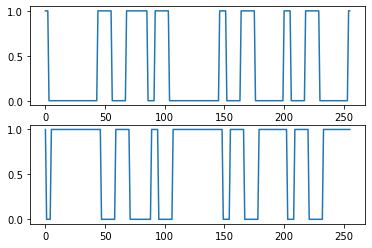

In [106]:
plt.subplot(211)
plt.plot(regular_state[524, :])
plt.subplot(212)
plt.plot(regular_state[3139, :])

In [63]:
ts_info = pd.read_csv(os.path.join('project/lcd_official/.cache/sim_data', 'transistors.csv'))
ws_info = pd.read_csv(os.path.join('project/lcd_official/.cache/sim_data', 'wires.csv'))

In [173]:
ts_info.loc[990]

bb      [5580, 5598, 913, 957]
c1                         657
c2                        1608
gate                       775
name                      t990
on                       False
x                       5589.0
y                        935.0
pos                        990
Name: 990, dtype: object

In [102]:
ts_info.loc[ts_info["gate"]==558]

,bb,c1,c2,gate,name,on,x,y,pos
3,"[7907, 7990, 9237, 9311]",558,943,558,t3,False,7948.5,9274.0,3
7,"[7282, 7300, 9212, 9329]",558,1171,558,t7,False,7291.0,9270.5,7
65,"[8298, 8423, 3215, 3239]",945,558,558,t65,False,8360.5,3227.0,65
364,"[8275, 8403, 3289, 3315]",82,558,558,t364,False,8339.0,3302.0,364
576,"[1384, 1404, 9258, 9386]",103,558,558,t576,False,1394.0,9322.0,576
697,"[662, 794, 9557, 9578]",1297,558,558,t697,False,728.0,9567.5,697
947,"[5605, 5624, 9574, 9688]",558,1672,558,t947,False,5614.5,9631.0,947
965,"[4997, 5090, 9364, 9428]",1171,558,558,t965,False,5043.5,9396.0,965
1358,"[8272, 8394, 1260, 1285]",558,175,558,t1358,False,8333.0,1272.5,1358
1445,"[8275, 8399, 2276, 2302]",558,650,558,t1445,False,8337.0,2289.0,1445


In [85]:
ws_info.loc[ws_info['wireid']==558]

,wireid,c1c2s,gates,pullup,name
551,558,2493,17,False,vss


In [165]:
regular = np.concatenate(np.load('/home/charon/project/lcd_official_test/.cache/sim_data/transistor_history.npy'), axis=1)
perturbed = np.load('/home/charon/project/lcd_official_test/.cache/sim_data/transistor_history_intervention_tidx_990_step_2.npy')

(array([     0,      1,      2, ..., 102397, 102398, 102399]),)


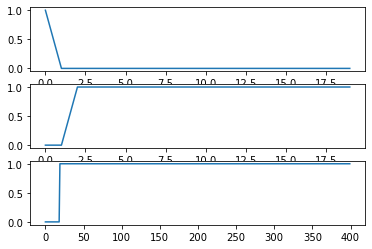

In [187]:
plt.subplot(311)
plt.plot(regular[0, 14000:14200:10])
plt.subplot(312)
plt.plot(regular[2673, 14000:14200:10])
plt.subplot(313)
plt.plot(perturbed[-1][1, :])
print(np.where(regular[0, :] != regular[2673, :]))

(array([  1217,   1218,   3207,   3208,  15207,  15208,  53607,  53608,
         58407,  58408,  75207,  75208,  80007,  80008,  96807,  96808,
        101607, 101608]),)

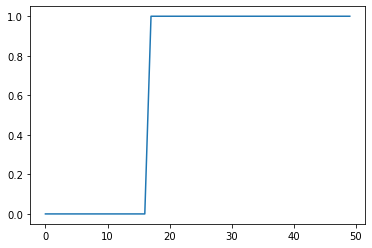

In [158]:
plt.plot(regular[990, 1200:1250])
np.where(regular[1, :] != regular[990, :])

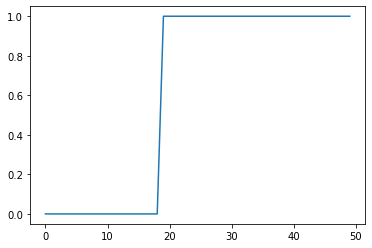

In [159]:
plt.plot(regular[1, 1200:1250])

In [196]:
# check the adjacency matrix
import pickle
label = pickle.load(open('/home/charon/project/lcd_official_test/.cache/sim_data/DonkeyKong/adjacency_matrix.pkl', 'rb'))
len([v for v in label.values() if v])/337/337

0.0032227104227385995

In [201]:
train_df = pd.read_csv('/home/charon/project/lcd_official_test/.cache/sim_data/DonkeyKong/csv/fold_seed_42/train_sim_grouped_interval_10.csv')
test_df = pd.read_csv('/home/charon/project/lcd_official_test/.cache/sim_data/DonkeyKong/csv/fold_seed_42/test_sim_grouped_interval_10.csv')

In [200]:
test_df["label"].value_counts()

0    5364
1     304
Name: label, dtype: int64

In [203]:
47334/3000

15.778

In [207]:
5364/(304/8)

141.1578947368421

In [208]:
4096*2

8192

In [209]:
temp = np.load('/home/charon/project/lcd_official_test/run/external/SRU_for_GCI/data/netsim/sim3_subject_1.npz')

In [212]:
# read .mat file
import scipy.io as sio
import numpy as np

data = sio.loadmat('/home/charon/project/lcd_official/.cache/netsim/sim3.mat')

In [218]:
np.all(np.where(data['net'][1]!=0, 1, 0).T == temp['Gref'])

True

In [224]:
pickle.load(open('/home/charon/project/lcd_official_test/.cache/sim_data/DonkeyKong/adjacency_matrix.pkl', 'rb'))

defaultdict(list,
            {0: [2673],
             1: [],
             2: [215],
             3: [14],
             4: [],
             5: [1124],
             6: [],
             2049: [3335],
             8: [67],
             9: [],
             10: [438],
             11: [1984, 226, 19, 410],
             12: [3421],
             2050: [],
             14: [],
             15: [],
             16: [],
             19: [],
             2069: [266],
             22: [],
             25: [507, 974],
             28: [124],
             29: [],
             30: [44],
             2054: [1201],
             38: [],
             40: [1541],
             41: [],
             42: [1589],
             44: [],
             46: [],
             50: [],
             2099: [1613],
             2100: [1581],
             57: [],
             58: [1577],
             59: [1472],
             61: [],
             2110: [1693],
             2111: [1280,
              194,
              131,
  

In [10]:
import numpy as np
mat1 = np.load('/project/lcd_v2/.cache/sim_data/DonkeyKong/HR/window_512_768/Regular_3510_step_256_rec_400_window_512_768.npy')
mat2 = np.load('/project/lcd_v2/.cache/sim_data/DonkeyKong/HR/window_768_1024/Regular_3510_step_256_rec_400_window_768_1024.npy')

# remove the constant rows
mat1 = np.stack([seq for seq in mat1 if seq.std()!=0], axis=0)
mat2 = np.stack([seq for seq in mat2 if seq.std()!=0], axis=0)

In [11]:
# calculate correlation between two matrices
from scipy.stats import pearsonr
from tqdm import tqdm
# check how many sequences are same
count = 0


# Function to check if a sequence is in another matrix
def sequence_not_in_matrix(seq, matrix):
    for row in matrix:
        if np.array_equal(seq, row):
            return False
    return True

count = 0
for row in tqdm(mat1):
    if sequence_not_in_matrix(row, mat2):
        count += 1




  0%|                                                                                                                                                                                 | 0/2289 [00:00<?, ?it/s]

  0%|                                                                                                                                                                         | 1/2289 [00:00<06:14,  6.11it/s]

  0%|▏                                                                                                                                                                        | 2/2289 [00:00<05:49,  6.54it/s]

  0%|▏                                                                                                                                                                        | 3/2289 [00:00<05:17,  7.19it/s]

  0%|▎                                                                                                                                                            

In [8]:
count/mat1.shape[0]

1.0

In [262]:
all_transistor_effects = pickle.load(open('/home/charon/project/lcd_official_test/.cache/sim_data/DonkeyKong/all_adjacency_matrices.pkl', 'rb'))

In [278]:
total_intersections = 0
total_test = 0
for idx, effects in all_transistor_effects.items():
    train_effects = effects[:int(len(effects) * 6/7)]
    test_effects = effects[int(len(effects) * 6/7):]

    train_common_effects = get_common_effects(train_effects)
    test_common_effects = get_common_effects(test_effects)

    intersection = set(train_common_effects).intersection(set(test_common_effects))
    total_intersections += len(intersection)
    total_test += len(test_common_effects)
    if idx == 452:
        print(test_common_effects)
    print('idx:', idx, 'intersection:', len(intersection), 'test: ', len(test_common_effects))
consistency = total_intersections / total_test
total_intersections, total_test, consistency

idx: 0 intersection: 1 test:  1
idx: 1 intersection: 0 test:  0
idx: 2 intersection: 1 test:  1
idx: 3 intersection: 0 test:  0
idx: 4 intersection: 0 test:  0
idx: 5 intersection: 0 test:  0
idx: 6 intersection: 0 test:  0
idx: 2049 intersection: 1 test:  1
idx: 8 intersection: 1 test:  1
idx: 9 intersection: 0 test:  0
idx: 10 intersection: 1 test:  1
idx: 11 intersection: 0 test:  0
idx: 12 intersection: 1 test:  1
idx: 2050 intersection: 0 test:  0
idx: 14 intersection: 0 test:  0
idx: 15 intersection: 0 test:  0
idx: 16 intersection: 0 test:  0
idx: 19 intersection: 0 test:  0
idx: 2069 intersection: 1 test:  1
idx: 22 intersection: 0 test:  0
idx: 25 intersection: 0 test:  0
idx: 28 intersection: 0 test:  0
idx: 29 intersection: 0 test:  0
idx: 30 intersection: 0 test:  0
idx: 2054 intersection: 1 test:  1
idx: 38 intersection: 0 test:  0
idx: 40 intersection: 0 test:  0
idx: 41 intersection: 0 test:  0
idx: 42 intersection: 1 test:  1
idx: 44 intersection: 0 test:  0
idx: 46 int

(318, 1037, 0.30665380906460943)

In [279]:
all_transistor_effects[3057]

[[],
 [],
 [14, 112, 226, 229, 372, 433, 978, 1984],
 [14],
 [14],
 [],
 [8,
  14,
  16,
  25,
  46,
  2121,
  89,
  159,
  162,
  190,
  2244,
  2258,
  221,
  226,
  229,
  2375,
  332,
  346,
  348,
  350,
  433,
  450,
  458,
  507,
  2560,
  519,
  534,
  2603,
  561,
  565,
  683,
  700,
  2759,
  721,
  462,
  2777,
  2787,
  2802,
  2827,
  789,
  2936,
  974,
  978,
  1053,
  3154,
  3168,
  3185,
  3191,
  3222,
  1179,
  1180,
  1230,
  2019,
  1260,
  1262,
  1268,
  1283,
  2605,
  3392,
  1347,
  1400,
  3450,
  3470,
  3493,
  1448,
  3500,
  3506,
  1531,
  1618,
  1687,
  1705,
  1729,
  1785,
  1870,
  1922,
  3399,
  1975,
  1984]]

In [6]:
import pickle
label = pickle.load(open('/project/lcd_v2/.cache/sim_data/DonkeyKong/HR/val/adjacency_matrix.pkl', 'rb'))
label[1]

[6,
 8,
 9,
 10,
 11,
 14,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 32,
 33,
 34,
 36,
 37,
 39,
 42,
 45,
 46,
 47,
 48,
 49,
 53,
 55,
 56,
 63,
 67,
 68,
 69,
 70,
 71,
 73,
 76,
 84,
 85,
 86,
 89,
 90,
 91,
 102,
 113,
 115,
 116,
 117,
 123,
 124,
 125,
 126,
 134,
 135,
 140,
 142,
 146,
 151,
 159,
 162,
 170,
 171,
 172,
 175,
 177,
 180,
 181,
 182,
 183,
 185,
 186,
 187,
 188,
 190,
 191,
 203,
 212,
 223,
 226,
 227,
 229,
 241,
 242,
 243,
 259,
 260,
 261,
 264,
 266,
 269,
 272,
 279,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 296,
 297,
 299,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 328,
 332,
 333,
 334,
 335,
 336,
 343,
 346,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 362,
 367,
 369,
 370,
 388,
 389,
 390,
 394,
 395,
 397,
 402,
 404,
 407,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 419,
 420,
 422,
 423,
 424,
 425,
 426,
 427,
 431,
 433,
 438,
 439,
 445,
 450,
 451,
 452,
 453,
 454,
 456,
 457,
 458,
 459,
 460,
 462,

In [1]:
from IPython.lib import passwd

ImportError: cannot import name 'passwd' from 'IPython.lib' (/usr/local/lib/python3.9/dist-packages/IPython/lib/__init__.py)

In [144]:
import numpy as np
npy = "/project/lcd_v2/.cache/dream3/logs/test_model_sru_ds_gene_dsid_1.npz"
res = np.load(npy)
res.files, res['Gref']

['Gref',
 'Gest',
 'model',
 'dataset',
 'dsid',
 'T',
 'F',
 'nepochs',
 'mu1',
 'mu2',
 'lr']

In [102]:
import sys
sys.path.append("/project/lcd_v2/run/external/SRU_for_GCI/utils/")
from utilFuncs import calcMetrics

In [135]:
calcMetrics("/project/lcd_v2/.cache/dream3/logs/test_model_sru_ds_gene_dsid_1.npz", 'sru', dataset='gene', verbose=1)

thresh = 0.0000, 	 TPR = 1.0000, 	 FPR = 0.9889, 	 Precision = 0.0126, 	 Recall = 1.0000


(array('sru', dtype='<U3'),
 array('gene', dtype='<U4'),
 array(1),
 array(966),
 array(0),
 array(1000),
 array(0.005),
 array(0.2),
 array(0.031623),
 0,
 1.0,
 0.9888607594936709,
 0.012639029322548028,
 1.0)

In [13]:
from sklearn.metrics import roc_auc_score, average_precision_score
import copy
N = res["Gref"].shape[0]
mask = np.eye(N, dtype=bool)
pred = copy.deepcopy(res["Gest"])
for ii in range(N):
    pred[ii, ii] = 0
print(pred)
roc_auc_score(res["Gref"].flatten(), pred.flatten()), average_precision_score(res["Gref"].flatten(), pred.flatten().flatten())

KeyError: 'Gref'

In [42]:
mat = np.load('/project/lcd_v2/.cache/sim_data/DonkeyKong/HR/window_256_512/Regular_3510_step_256_rec_400_window_256_512.npy', mmap_mode='r')
adj = pickle.load(open('/project/lcd_v2/.cache/sim_data/DonkeyKong/HR/window_256_512/adjacency_matrix.pkl', 'rb'))
u, i = np.unique(mat, return_index=True, axis=0)

In [99]:
_ = [ii for ii in adj if mat[ii].std()!=0]

In [105]:
mat[3].std()!=0

False

In [87]:
# construct pairs from adjacency matrix
pos_pair, neg_pair = [], []


for ii in i:
    for jj in i:
        # skip the same sequence & skip the constant sequence
        if ii == jj:
            continue
        if jj in adj[ii]:
            pos_pair.append((ii, jj))
        else:
            neg_pair.append((ii, jj))
print('number of positive pairs:', len(pos_pair)), print('number of negative pairs:', len(neg_pair))

number of positive pairs: 209
number of negative pairs: 218347


(None, None)

(array([101213]),)


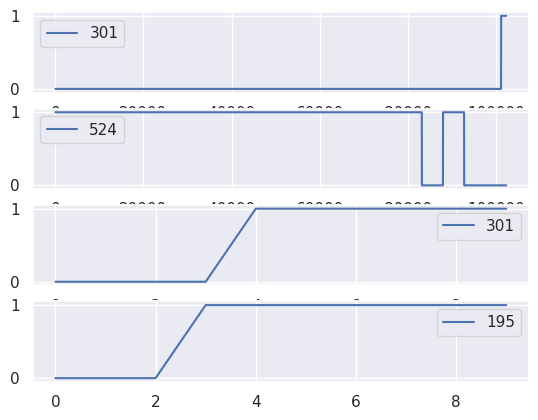

In [98]:
# plot the line chart of positive and negative pairs
import matplotlib.pyplot as plt

plt.subplot(4, 1, 1)
plt.plot(mat[pos_pair[0][0]], label=pos_pair[0][0])
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(mat[pos_pair[0][1]], label=pos_pair[0][1])
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(mat[neg_pair[0][0]][101210:101220], label=neg_pair[0][0])
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(mat[neg_pair[0][1]][101210:101220], label=neg_pair[0][1])
plt.legend()
print(np.where(mat[neg_pair[0][0]]!=mat[neg_pair[0][1]]))

In [11]:
import pickle
dataset_id = [1, 2, 3, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21]
methods = ['dynotears', 'granger_causality', 'mutual_info', 'pcmciplus', 'var_lingam', ]
res = {i: {method: pickle.load(open(f"/project/lcd_v2/.cache/sim_data/netsim_auc_result/dataset=netsim_{i}-method={method}.pkl", "rb")) for method in methods} for i in dataset_id}

In [ ]:
# load sru and eSRU result


In [38]:
def float2binary(l):
    l = np.where(l!=0, 1, 0)
    return l

score = {}

for id in dataset_id:
    score[id] = {}
    for method in methods:
        score[id][method] = {}
        score_auroc, score_auprc = [], []
        for subject in res[id][method]:
            label = float2binary(subject['label']).reshape(-1)
            pred = subject['pred'].reshape(-1)
            score_auroc.append(roc_auc_score(label, pred))
            score_auprc.append(average_precision_score(label, pred))

        score[id][method]['auroc'] = score_auroc
        score[id][method]['auprc'] = score_auprc
       # print mean and std of each method
        print("--------------------------")
        print(f"dataset {id}, method {method}, auroc: {np.mean(score[id][method]['auroc'])}, auprc: {np.mean(score[id][method]['auprc'])}")


--------------------------
dataset 1, method dynotears, auroc: 0.7550000000000001, auprc: 0.3480872281313458
--------------------------
dataset 1, method granger_causality, auroc: 0.6385, auprc: 0.36297150072150075
--------------------------
dataset 1, method mutual_info, auroc: 0.7020000000000001, auprc: 0.3879431662062231
--------------------------
dataset 1, method pcmciplus, auroc: 0.5925, auprc: 0.3246666666666667
--------------------------
dataset 1, method var_lingam, auroc: 0.8310000000000001, auprc: 0.6469994025582262
--------------------------
dataset 2, method dynotears, auroc: 0.7602145045965271, auprc: 0.21474311590620862
--------------------------
dataset 2, method granger_causality, auroc: 0.6577119509703779, auprc: 0.2804688325435972
--------------------------
dataset 2, method mutual_info, auroc: 0.7400408580183861, auprc: 0.30647748739651914
--------------------------
dataset 2, method pcmciplus, auroc: 0.5927477017364658, auprc: 0.22236796536796538
------------------

[0.6,
 0.6266666666666667,
 0.6133333333333333,
 0.5133333333333333,
 0.52,
 0.5733333333333333,
 0.5733333333333334,
 0.5333333333333333,
 0.41333333333333344,
 0.6133333333333333]

[{'pred': array([0.05283795, 0.02601145, 0.06753971, 0.02399119, 0.        ,
         0.04883307, 0.        , 0.04127485, 0.07619903, 0.17668311,
         0.07720742, 0.        , 0.00303316, 0.08975359, 0.07719321,
         0.12672923, 0.18687473, 0.        , 0.        , 0.19452814]),
  'label': array([0.3765996 , 0.        , 0.        , 0.36490253, 0.        ,
         0.41184448, 0.        , 0.        , 0.        , 0.        ,
         0.4314809 , 0.        , 0.        , 0.        , 0.        ,
         0.54435082, 0.        , 0.        , 0.        , 0.        ])},
 {'pred': array([0.09267421, 0.10315369, 0.08180367, 0.01433776, 0.10788771,
         0.13490481, 0.06954397, 0.0946398 , 0.        , 0.0260498 ,
         0.25553684, 0.        , 0.04608315, 0.        , 0.09229195,
         0.01231095, 0.1544773 , 0.        , 0.11148129, 0.04944042]),
  'label': array([0.46232339, 0.        , 0.        , 0.42120352, 0.        ,
         0.47990486, 0.        , 0.        , 0.        , 0.   

In [149]:
from glob import glob
sims = [1, 2, 3, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21]
# caulculate auroc and auprc
score = {}
for sim in sims:
    score[f'sim{sim}'] = {}
    file_name = f"sim{sim}"
    for method in ['eSRU_2LF', 'sru']:
        print(f"dataset {sim}, file name: {file_name}")
        sim_path = glob(f"/project/lcd_v2/.cache/netsim/logs/test_model_{method}_ds_netsim_dsid_{sim}_subj_*.npz")
        res = [np.load(i) for i in sim_path]

        score[file_name][method] = {'auroc': [], 'auprc': []}
        for _res in res:
            print(_res["Gref"])
            mask = np.eye(_res['Gref'].shape[0], dtype=bool)
            pred = copy.deepcopy(_res['Gest'])[~mask]
            label = copy.deepcopy(_res['Gref'])[~mask]
            print(pred, label)
            score[file_name][method]['auroc'].append(roc_auc_score(label.flatten(), pred.flatten()))
            score[file_name][method]['auprc'].append(average_precision_score(label.flatten(), pred.flatten()))
        score[file_name][method]['mean_auroc'] = np.mean(score[file_name][method]['auroc'])
        score[file_name][method]['mean_auprc'] = np.mean(score[file_name][method]['auprc'])
        print(f"method: {method}, auroc: {score[file_name][method]['mean_auroc']}, auprc: {score[file_name][method]['mean_auprc']}")



dataset 1, file name: sim1
[[-1  0  0  0  0]
 [ 0 -1  0  0  0]
 [ 0  0 -1  0  0]
 [ 0  0  0 -1  0]
 [ 0  0  0  0 -1]]
[0.40930787 0.5739523  0.3796894  0.7315814  0.6312041  0.40876982
 0.49461114 0.49166012 0.41184238 0.51476514 0.39162713 0.5125729
 0.47120398 0.5226424  0.54123294 0.5087879  0.49145958 0.5714849
 0.41044724 0.32911912] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.